(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week09/notebook/demo.ipynb)

# Work with Imbalanced Data

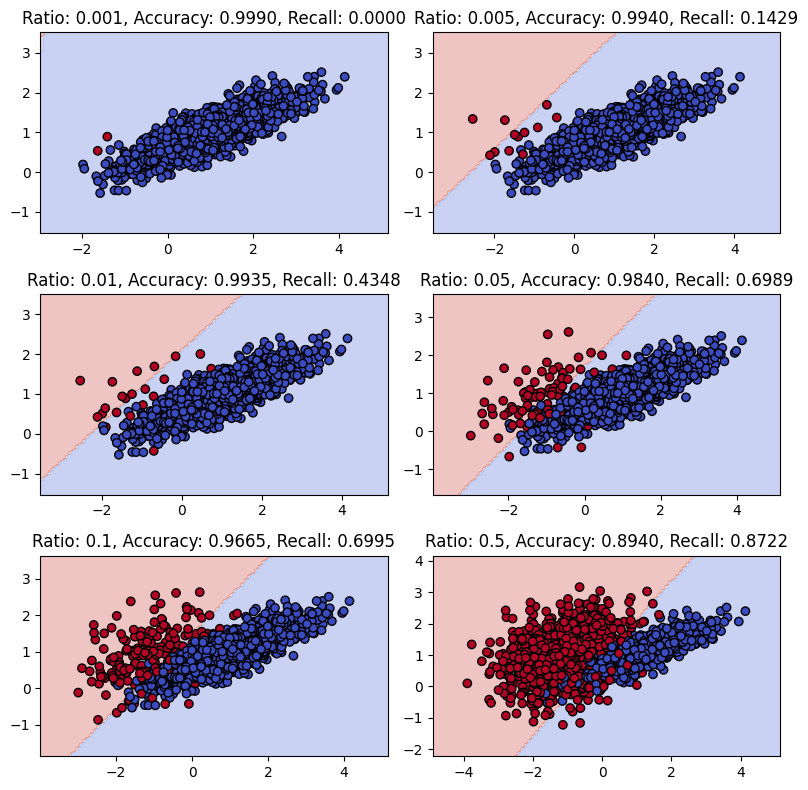

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

def generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.05, random_state=1):
    X, y = make_classification(n_samples=n_sample, n_features=2, n_redundant=0, n_clusters_per_class=1,
                               weights=[1 - minority_ratio], class_sep=1, flip_y=0, random_state=random_state)
    return X, y

# Function to plot decision boundaries
def plot_decision_boundaries(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

inputs_to_visualize = []
for minority_ratio in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
    # Generate an imbalanced dataset
    X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=minority_ratio)
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    # Fit a logistic regression model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    # Check the accuracy and recall
    accuracy = accuracy_score(y_test, model.predict(X_test))
    recall = recall_score(y_test, model.predict(X_test))
    # Store the input data for visualization
    inputs_to_visualize.append((minority_ratio, model, X_test, y_test, accuracy, recall))

# visualize all in a 1x3 grid
nrow, ncol = 3, 2
fig, axes = plt.subplots(nrow, ncol, figsize=(8, 8))
for i, (minority_ratio, model, X_input, y_input, accuracy, recall) in enumerate(inputs_to_visualize):
    plot_decision_boundaries(model, X_input, y_input, axes[i//ncol][i%ncol], f"Ratio: {minority_ratio}, Accuracy: {accuracy:.4f}, Recall: {recall:.4f}")
plt.tight_layout()
plt.show()


# SMOTE (Synthetic Minority Over-sampling Technique)

In [2]:
import imblearn

imblearn.__version__

'0.13.0'

Counter({np.int64(0): 9900, np.int64(1): 100})


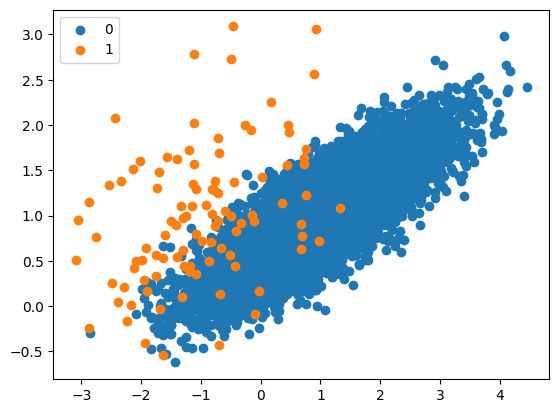

In [3]:
from collections import Counter

# define dataset
X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.01, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

for label in counter:
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
plt.legend()
plt.show()

Counter({np.int64(0): 9900, np.int64(1): 9900})


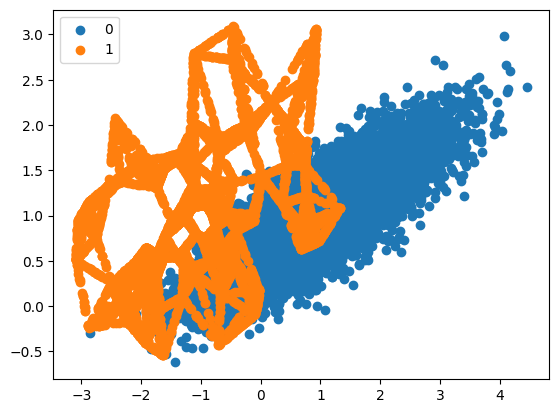

In [4]:
from imblearn.over_sampling import SMOTE

X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.01, random_state=1)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label in counter:
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
plt.legend()
plt.show()

The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

Counter({np.int64(0): 9900, np.int64(1): 100})
Counter({np.int64(0): 9900, np.int64(1): 990})


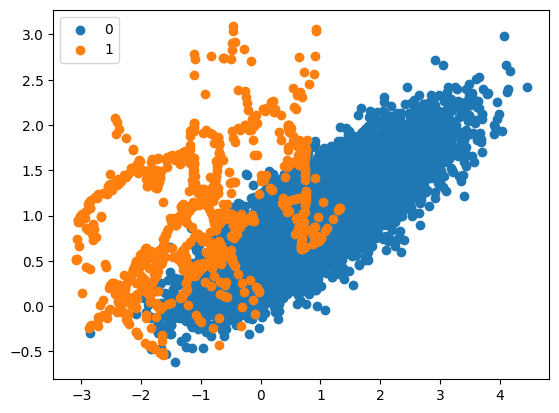

In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.01, random_state=1)
counter = Counter(y)
print(counter)

over = SMOTE(sampling_strategy=0.1)
X, y = over.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label in counter:
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
plt.legend()
plt.show()

Counter({np.int64(0): 9900, np.int64(1): 100})
Counter({np.int64(0): 1980, np.int64(1): 990})


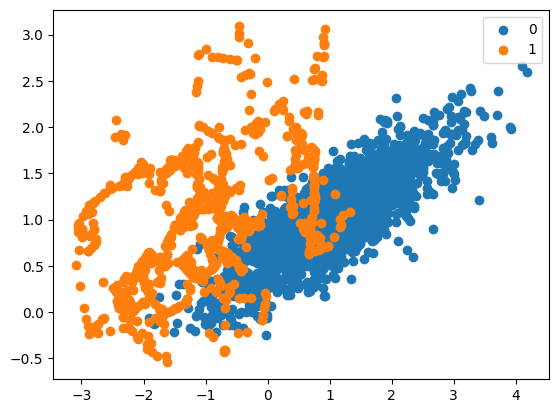

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X, y = generate_imbalanced_dataset(n_sample=10000, minority_ratio=0.01, random_state=1)
counter = Counter(y)
print(counter)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label in counter:
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()